# Affinity Propagation

### Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn import cluster as ct
from sklearn import decomposition as dc
from IPython import display
import time
import warnings

warnings.filterwarnings("ignore")

### Importar bases de dados

In [2]:
x = pd.read_csv('../datasets/clusterizacao/X_dataset.csv')

### Affinity Propagation

In [3]:
# Testando parametros
p = np.arange(-100, -150, -1)

ss_list = []
k_list = []

best_p = 0
best_k = 0
best_ss = 0

for i in range(len(p)):
    # Model definition
    modelo = ct.AffinityPropagation(preference=p[i])

    # treinamento
    modelo.fit(x)

    # predição
    labels = modelo.labels_

    # Performance
    ss = mt.silhouette_score(x, labels)
    ss_list.append(ss)
    k_list.append(len(modelo.cluster_centers_indices_))

    # Melhor K e Melhor Valor
    display.clear_output(wait=True)
    time.sleep(0.2)

    best_p = p[np.argmax(ss_list)]
    best_k = k_list[np.argmax(ss_list)]
    best_ss = np.round(max(ss_list), 3)

    print(f"Preference: {p[i]}")
    print(f"Best Preference Value: {best_p}")
    print(f"Best Number of Clusters: {best_k}")
    print(f"Best Silhouette Score: {best_ss}")

Preference: -149
Best Preference Value: -142
Best Number of Clusters: 3
Best Silhouette Score: 0.215


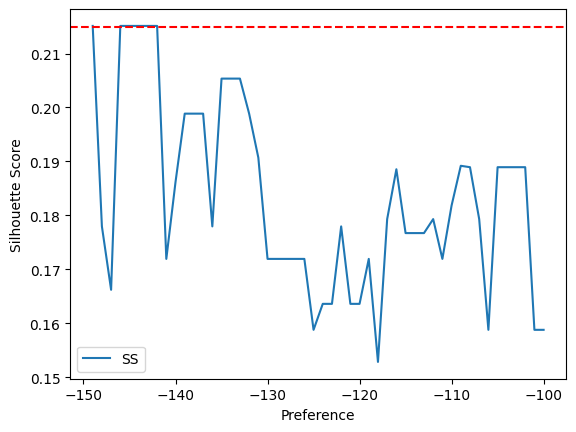

In [4]:
plt.plot(p, ss_list, label="SS")
plt.axhline(y=best_ss, color="r", linestyle="--")
plt.xlabel("Preference")
plt.ylabel("Silhouette Score")
plt.legend()

### PCA

Text(0.5, 1.0, 'Affinity Propagation')

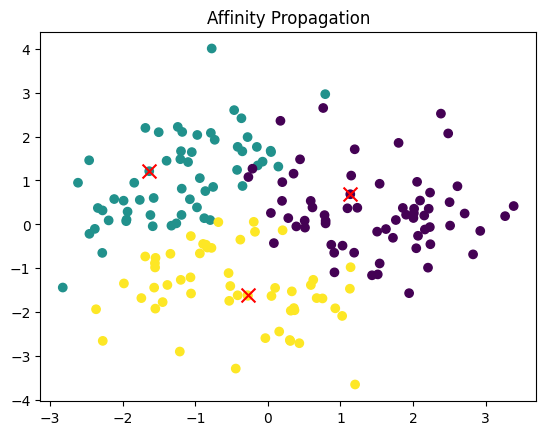

In [6]:
pca = dc.PCA(n_components=2)
reduced_X = pca.fit_transform(x)
reduced_X = pd.DataFrame(data=reduced_X, columns=["X", "Y"])
reduced_X.head()

# reduced centers
centers = pca.transform(modelo.cluster_centers_)
centers

# Scatter Plot
plt.scatter(reduced_X["X"], reduced_X["Y"], c=modelo.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=100, c="red")
plt.title("Affinity Propagation")

# SALVANDO RESULTADOS

In [6]:
train_metrics = {
    "Algorithm": "Affinity Propagation",
    "N Clusters": best_k,
    "Average Silhouette Score": best_ss,
}

pd.DataFrame(train_metrics, index=[0]).to_csv("./clustering_metrics.csv", mode="a", header=False)